# Plant analysis

Plant images classification into 4 different classes from a dataset of Soybean crops.
Only the `numpy` library is allowed for machine learning.

Dataset downloaded from Kaggle : [Weed Detection in Soybean Crops](https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops)

Inspired by [Math of Neural Networks — from scratch in Python](https://medium.com/datadriveninvestor/math-neural-network-from-scratch-in-python-d6da9f29ce65), by Omar Aflak

### Imports

In [1]:
# System
import os

# Visualization
import matplotlib.pyplot as plt

# Scientific computing
import numpy as np

### Configuration

In [2]:
DATASET_ROOT = 'dataset'
DATASETS = {}

## Data
### Loading

In [3]:
print('Datasets')
labels = os.listdir(DATASET_ROOT)
for label in labels:
    label_directory = os.path.join(DATASET_ROOT, label)
    _, _, DATASETS[label] = next(os.walk(label_directory))
    print('  >', label, ':', len(DATASETS[label]), 'files')

Datasets
  > broadleaf : 1191 files
  > grass : 3520 files
  > soil : 3249 files
  > soybean : 7376 files


### Visualization

  > broadleaf


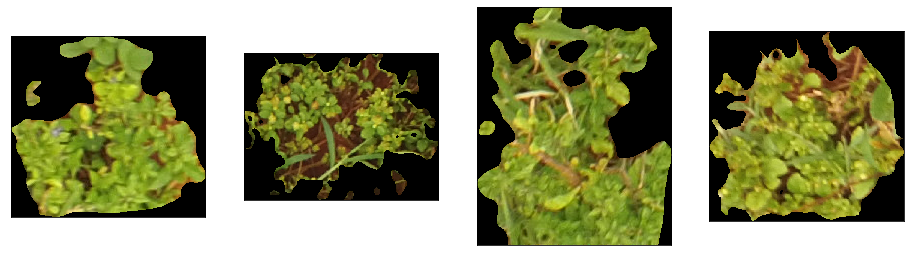

  > grass


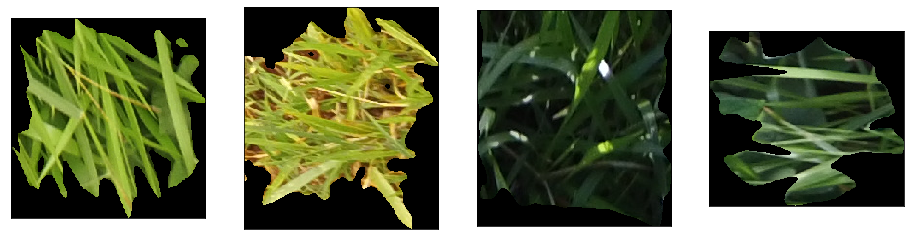

  > soil


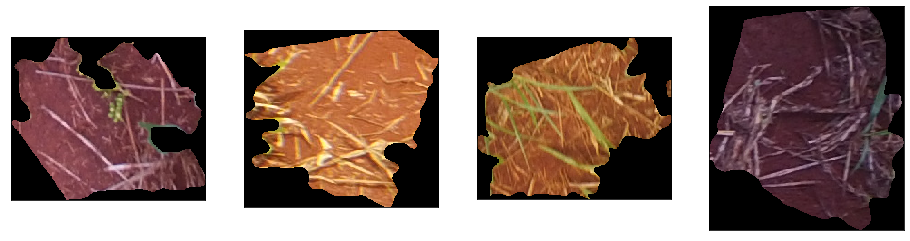

  > soybean


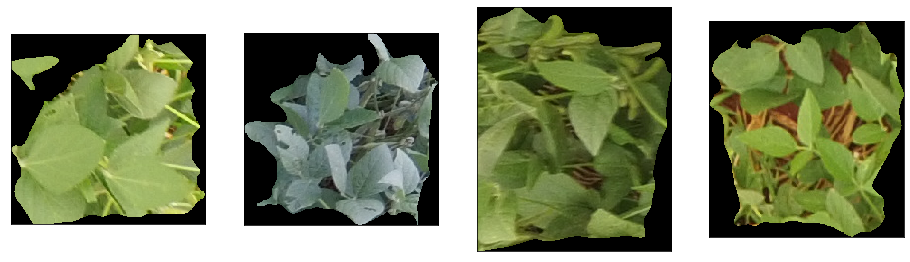

In [4]:
images_per_row = 4
for dataset_name, dataset_files in DATASETS.items():
    dataset_directory = os.path.join(DATASET_ROOT, dataset_name)
    print('  >', dataset_name)
    _, axs = plt.subplots(1, images_per_row, figsize=(16,16))
    images = []
    for i in range(images_per_row):
        image = plt.imread(os.path.join(dataset_directory, dataset_files[i]))
        axs[i].imshow(image)
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
    plt.show()

## Neural Network
### Base layer

In [5]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

### Layers

In [6]:
class DenseLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [7]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

### Activation functions

In [8]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x) ** 2

### Loss functions

In [9]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

### Network

In [10]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        samples = len(input_data)
        result = []

        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate, verbose=False):
        samples = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(samples):
                if verbose:
                    print("- processing sample %d/%d" % (j + 1, samples))
                output = x_train[j]
                #layers_count = 0
                for layer in self.layers:
                    #layers_count += 1
                    #if verbose:
                        #print("- forward propagation in layer %d/%d..." % (layers_count, len(self.layers)))
                    output = layer.forward_propagation(output)
                    
                err += self.loss(y_train[j], output)
                
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    #if verbose:
                        #print("- backward propagation in layer %d/%d..." % (layers_count, len(self.layers)))
                    #layers_count -= 1
                    error = layer.backward_propagation(error, learning_rate)
                
            err /= samples
            print("epoch %d/%d; error=%f" % (i + 1, epochs, err))

### Test : XOR

In [11]:
# xor
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

In [12]:
# network
net = Network()
net.add(DenseLayer(2, 3))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(DenseLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_prime))

In [13]:
# train
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

epoch 1/1000; error=0.554723
epoch 2/1000; error=0.300510
epoch 3/1000; error=0.283365
epoch 4/1000; error=0.280244
epoch 5/1000; error=0.278751
epoch 6/1000; error=0.277562
epoch 7/1000; error=0.276438
epoch 8/1000; error=0.275318
epoch 9/1000; error=0.274183
epoch 10/1000; error=0.273029
epoch 11/1000; error=0.271854
epoch 12/1000; error=0.270660
epoch 13/1000; error=0.269446
epoch 14/1000; error=0.268215
epoch 15/1000; error=0.266968
epoch 16/1000; error=0.265709
epoch 17/1000; error=0.264438
epoch 18/1000; error=0.263158
epoch 19/1000; error=0.261873
epoch 20/1000; error=0.260584
epoch 21/1000; error=0.259294
epoch 22/1000; error=0.258006
epoch 23/1000; error=0.256723
epoch 24/1000; error=0.255448
epoch 25/1000; error=0.254182
epoch 26/1000; error=0.252929
epoch 27/1000; error=0.251692
epoch 28/1000; error=0.250472
epoch 29/1000; error=0.249271
epoch 30/1000; error=0.248092
epoch 31/1000; error=0.246936
epoch 32/1000; error=0.245804
epoch 33/1000; error=0.244698
epoch 34/1000; erro

epoch 512/1000; error=0.000838
epoch 513/1000; error=0.000835
epoch 514/1000; error=0.000832
epoch 515/1000; error=0.000828
epoch 516/1000; error=0.000825
epoch 517/1000; error=0.000822
epoch 518/1000; error=0.000819
epoch 519/1000; error=0.000816
epoch 520/1000; error=0.000813
epoch 521/1000; error=0.000810
epoch 522/1000; error=0.000808
epoch 523/1000; error=0.000805
epoch 524/1000; error=0.000802
epoch 525/1000; error=0.000799
epoch 526/1000; error=0.000796
epoch 527/1000; error=0.000793
epoch 528/1000; error=0.000790
epoch 529/1000; error=0.000788
epoch 530/1000; error=0.000785
epoch 531/1000; error=0.000782
epoch 532/1000; error=0.000779
epoch 533/1000; error=0.000777
epoch 534/1000; error=0.000774
epoch 535/1000; error=0.000771
epoch 536/1000; error=0.000769
epoch 537/1000; error=0.000766
epoch 538/1000; error=0.000763
epoch 539/1000; error=0.000761
epoch 540/1000; error=0.000758
epoch 541/1000; error=0.000755
epoch 542/1000; error=0.000753
epoch 543/1000; error=0.000750
epoch 54

In [14]:
# predict
out = net.predict(x_train)
print(out)

[array([[0.00099799]]), array([[0.9771887]]), array([[0.97562804]]), array([[-0.00199226]])]


### Test : MNIST

In [15]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [16]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = np_utils.to_categorical(y_train)

In [19]:
print(x_train.shape)
print(y_train.shape)

(60000, 1, 784)
(60000, 10)


In [20]:
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [21]:
print(x_test.shape)
print(y_test.shape)

(10000, 1, 784)
(10000, 10)


In [22]:
# Network
net = Network()
net.add(DenseLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(DenseLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(DenseLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add(ActivationLayer(tanh, tanh_prime))

In [23]:
# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(mse, mse_prime)
net.fit(x_train[:1000], y_train[:1000], epochs=35, learning_rate=0.1)

epoch 1/35; error=0.229820
epoch 2/35; error=0.093539
epoch 3/35; error=0.072345
epoch 4/35; error=0.059877
epoch 5/35; error=0.051508
epoch 6/35; error=0.045260
epoch 7/35; error=0.040211
epoch 8/35; error=0.036093
epoch 9/35; error=0.032532
epoch 10/35; error=0.029380
epoch 11/35; error=0.026773
epoch 12/35; error=0.024537
epoch 13/35; error=0.022619
epoch 14/35; error=0.020997
epoch 15/35; error=0.019541
epoch 16/35; error=0.018218
epoch 17/35; error=0.016993
epoch 18/35; error=0.015776
epoch 19/35; error=0.014804
epoch 20/35; error=0.013866
epoch 21/35; error=0.013214
epoch 22/35; error=0.012560
epoch 23/35; error=0.012101
epoch 24/35; error=0.011638
epoch 25/35; error=0.011296
epoch 26/35; error=0.010723
epoch 27/35; error=0.010116
epoch 28/35; error=0.009722
epoch 29/35; error=0.009216
epoch 30/35; error=0.008795
epoch 31/35; error=0.008444
epoch 32/35; error=0.008096
epoch 33/35; error=0.007855
epoch 34/35; error=0.007482
epoch 35/35; error=0.007368


> true values
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


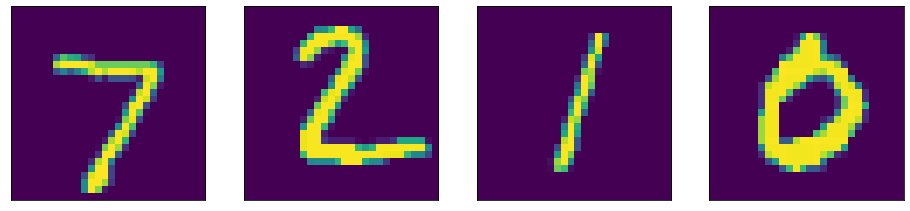

> predicted values
[[[False False False False False False False  True False False]]

 [[False False False False False False False False False False]]

 [[False  True False False False False False False False False]]

 [[ True False False False False False False False False False]]]


In [24]:
# test
num_samples = 4

print("> true values")
print(y_test[:num_samples])

_, axs = plt.subplots(1, num_samples, figsize=(16,16))
images = []
for i in range(num_samples):
    image = x_test[i].reshape(28, 28)
    axs[i].imshow(image)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
plt.show()

print("> predicted values")
predictions = net.predict(x_test[:num_samples])
np_predictions = np.array(predictions)
print(np_predictions > 0.9)

### Test : plant analysis

In [25]:
import cv2
import sys
import json

def compute_dimension(key, value):
        dimensions[key]['min'] = min(dimensions[key].get('min', sys.maxsize), value)
        dimensions[key]['max'] = max(dimensions[key].get('max', 0), value)
        dimensions[key]['mean'] = ((dimensions[key].get('_previous_mean', 0) * (dimensions.get('_count', 1) - 1)) + value) / dimensions.get('_count', 1)
        dimensions[key]['_previous_mean'] = dimensions[key]['mean']

def update_dimensions():
    dimensions['_count'] = dimensions.get('_count', 0) + 1

def clean_dimensions():
    dimensions['width'].pop('_previous_mean', None)
    dimensions['height'].pop('_previous_mean', None)
    dimensions.pop('_count', None)

dimensions = { 'width':{}, 'height':{}, 'channels':3 }
for dataset_name, dataset_files in DATASETS.items():
    dataset_directory = os.path.join(DATASET_ROOT, dataset_name)
    for i in range(len(dataset_files)):
        image = cv2.imread(os.path.join(dataset_directory, dataset_files[i]))
        width, height, _ = image.shape

        compute_dimension('width', width)
        compute_dimension('height', height)

        update_dimensions()

clean_dimensions()
print(json.dumps(dimensions, indent=4))

{
    "width": {
        "min": 126,
        "max": 405,
        "mean": 241.1025105966744
    },
    "height": {
        "min": 109,
        "max": 427,
        "mean": 246.95526573198566
    },
    "channels": 3
}


In [26]:
labels_count = 0
files_count = 0
for dataset_name, dataset_files in DATASETS.items():
    print(dataset_name, len(dataset_files))
    labels_count += 1
    files_count += len(dataset_files)
print(labels_count, files_count)

# MemoryError: Unable to allocate array with shape (61344, 240, 240, 3) and data type float32
# We have to cap the number of files per class, otherwise we'll run out of memory
files_count = 1000

broadleaf 1191
grass 3520
soil 3249
soybean 7376
4 15336


In [27]:
IMAGE_SHAPE_X = 200
IMAGE_SHAPE_Y = 200
IMAGE_CHANNELS = 3

In [28]:
# Categorize data
y_map = {
    'broadleaf': [1,0,0,0],
    'grass':     [0,1,0,0],
    'soil':      [0,0,1,0],
    'soybean':   [0,0,0,1],
}

In [29]:
X = np.ndarray(shape=(files_count*labels_count, IMAGE_SHAPE_X, IMAGE_SHAPE_Y, IMAGE_CHANNELS), dtype=np.float32)
Y = np.ndarray(shape=(files_count*labels_count, 1, labels_count), dtype=np.float32)

total = 0
for dataset_name, dataset_files in DATASETS.items():
    dataset_directory = os.path.join(DATASET_ROOT, dataset_name)
    for i in range(files_count):
        file = os.path.join(dataset_directory, dataset_files[i])
        X[i + total] = cv2.resize(cv2.imread(file), (IMAGE_SHAPE_X, IMAGE_SHAPE_Y))
        Y[i + total] = y_map[dataset_name]

    total += files_count

In [30]:
print(X.shape)
print(Y.shape)

(4000, 200, 200, 3)
(4000, 1, 4)


In [31]:
count = X.shape[0]
width = X.shape[1]
height = X.shape[2]
channels = X.shape[3]

# reshape
X = X.reshape(count, 1, width * height * channels)
X = X.astype('float32')

#normalize
X /= 255

In [32]:
print(X.shape)
print(Y.shape)

(4000, 1, 120000)
(4000, 1, 4)


In [33]:
Y = Y.reshape(count, 4)

In [34]:
print(X.shape)
print(Y.shape)

(4000, 1, 120000)
(4000, 4)


In [35]:
# Manual split : 70% train, 30% test, for each class of 1000 data each
def get_train_data(S):
    return np.vstack((S[0:700], S[1000:1700], S[2000:2700], S[3000:3700]))

def get_test_data(S):
    return np.vstack((S[700:1000], S[1700:2000], S[2700:3000], S[3700:4000]))

X_train = get_train_data(X)
X_test = get_test_data(X)

Y_train = get_train_data(Y)
Y_test = get_test_data(Y)

print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

2800 2800
1200 1200


In [36]:
# Network
net = Network()
net.add(DenseLayer(120000, 1000))             # input_shape=(1, 120000) ; output_shape=(1, 1000)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(DenseLayer(1000, 50))                 # input_shape=(1, 1000)   ; output_shape=(1, 50)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(DenseLayer(50, 4))                    # input_shape=(1, 50)     ; output_shape=(1, 4)
net.add(ActivationLayer(tanh, tanh_prime))

In [37]:
net.use(mse, mse_prime)
net.fit(X_train, Y_train, epochs=5, learning_rate=0.1)

epoch 1/5; error=0.198934
epoch 2/5; error=0.125541
epoch 3/5; error=0.120361
epoch 4/5; error=0.121490
epoch 5/5; error=0.122884


> true values
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


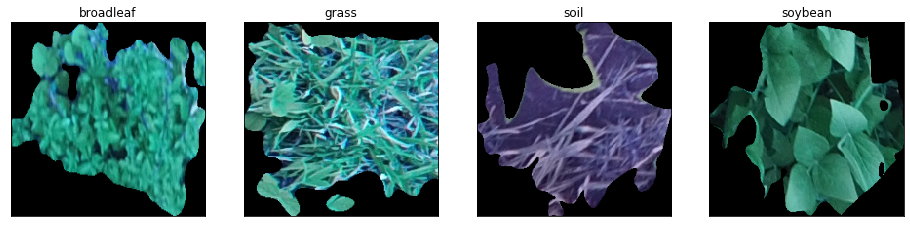

> predicted values
[[[[0.42328761 0.45954782 0.45396413 0.99279655]]]


 [[[0.42328687 0.45954838 0.45396466 0.99279657]]]


 [[[0.42322413 0.45952752 0.4540123  0.99279626]]]


 [[[0.4232878  0.45954883 0.45396492 0.99279658]]]]


In [48]:
# test
samples = [100, 500, 800, 1000] # one of each class, 1200 samples in total
num_samples = len(samples)

print("> true values")
for sample in samples:
    print(Y_test[sample])

_, axs = plt.subplots(1, num_samples, figsize=(16,16))
images = []
for i in range(num_samples):
    image = X_test[samples[i]].reshape(IMAGE_SHAPE_X, IMAGE_SHAPE_Y, IMAGE_CHANNELS)
    axs[i].imshow(image)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(labels[i])
plt.show()

print("> predicted values")
predictions = []
for sample in samples:
    predictions.append(net.predict(X_test[sample]))
np_predictions = np.array(predictions)
print(np_predictions)

# Something is wrong with the prediction - don't have time to look into it now.